<a href="https://www.kaggle.com/code/aleksandrmorozov123/monte-carlo-simulations?scriptVersionId=186228423" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center>
<h1> Malliavin Calculus </h1>

In this notebook, we will present our simulations

In [ ]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from IPython.display import display
np.random.seed(40)

### Question a)

In this section, we will compute the risky asset prices and the price of 2 types of options : a standard European option with strike K1 and an Digital Call option with two strikes K1 and K2, then we will show the associated results of each value of M.

We define the functions used to generate a Brownian Motion, and to calculate the asset prices, the payoff and the option price.

In [ ]:
def asset_prices(r, sigma, T, M, N, x):
    B = np.zeros((N, M+1))
    B[:,1:] = np.cumsum(np.sqrt(T/(M+1))*np.random.normal(size=(N, M)), axis=1)
    e =(r-(sigma**2)/2)*(T/(M+1))*np.arange(0, M+1)+B*sigma
    return (x*np.exp(e), B)

def standard_payoff(spot_price, K1, K2):
    return (spot_price - K1)*(spot_price>K1)

def two_strikes_payoff(spot_price, K1, K2):
    return 1*(K1<spot_price) & (spot_price<K2)

def price_estimations(r, sigma, T, M, N, x, Nf, step, K1, K2, payoff_function):
    option_prices = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for i in range(N, Nf+1, step):
        prices = asset_prices(r, sigma, T, M, i, x)[0]
        european_spot_price = (T/(M+1))*prices.sum(axis = 1)
        payoff = payoff_function(european_spot_price, K1, K2)
        option_price = np.mean(np.exp(-r*T)*payoff)
        option_prices.append(option_price)
        emp_var = np.var(payoff, ddof = 1)/i
        emp_vars.append(emp_var)
        confidence_inters_lower.append(option_price - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(option_price + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Option_Price' : option_prices, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.arange(1000, 51001, 2000), inplace = True)
    df.index.name = 'N'
    return df

In the following, we will deal with the case of a standard European Call option with strike K1.

First, we are going to display a Dataframe table for each M with 4 columns : the option price, the empirical variance and the confidence interval for each N (simulations number). Then, we will plot the convergence of the estimators with a confidence interval at 99% for each value of M.

In [ ]:
# Parameters
r = 0.05 # Risk free rate
sigma = 0.15
T = 1
N = 1000 # Number of simulations
x = 100 # S_0
Nf = 51000 # Max number of simulations
step = 2000
K1 = 100
K2 = 110
M1 = 50
M2 = 150
M3 = 247



In the case of M = 50 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,4.794322,0.043299,4.386478,5.202166
3000,4.502593,0.012475,4.283679,4.721508
5000,4.604646,0.007782,4.431740,4.777552
7000,4.678586,0.005704,4.530551,4.826621
9000,4.601550,0.004369,4.471993,4.731107
11000,4.606056,0.003569,4.488958,4.723153
13000,4.633548,0.002973,4.526681,4.740415
15000,4.578674,0.002624,4.478274,4.679073
17000,4.572194,0.002270,4.478801,4.665586




In the case of M = 150 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,4.784796,0.042329,4.381547,5.188044
3000,4.694145,0.013212,4.468859,4.919431
5000,4.637885,0.008308,4.459230,4.816540
7000,4.650076,0.005816,4.500599,4.799554
9000,4.675086,0.004539,4.543040,4.807132
11000,4.600880,0.003590,4.483439,4.718320
13000,4.646838,0.003080,4.538057,4.755619
15000,4.616058,0.002671,4.514771,4.717346
17000,4.684601,0.002346,4.589660,4.779543




In the case of M = 247 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,4.555575,0.040122,4.162975,4.948175
3000,4.785638,0.013812,4.555294,5.015982
5000,4.637727,0.007956,4.462899,4.812556
7000,4.768640,0.005771,4.619738,4.917542
9000,4.613345,0.004497,4.481906,4.744783
11000,4.784659,0.003831,4.663343,4.905975
13000,4.614499,0.003047,4.506305,4.722692
15000,4.681176,0.002685,4.579623,4.782729
17000,4.639452,0.002360,4.544233,4.734671


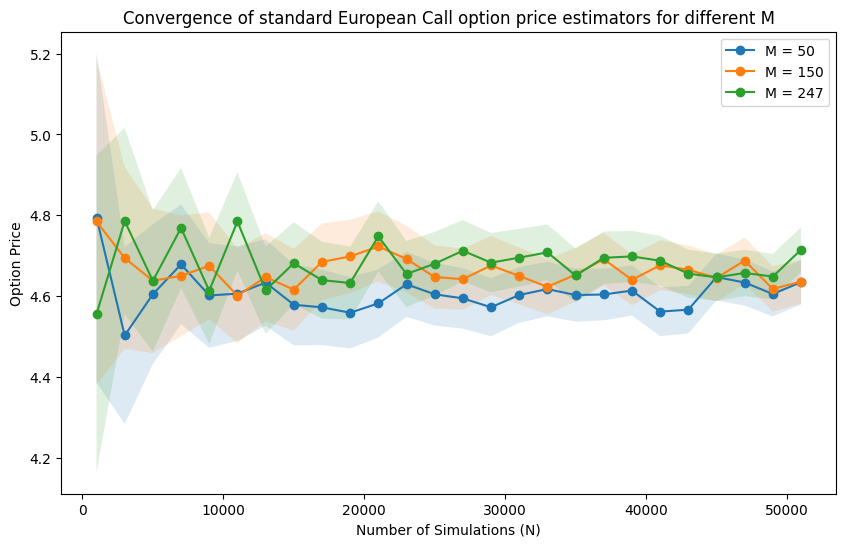

In [ ]:
# Create the estimators for each M
results_M1 = price_estimations(r, sigma, T, M1, N, x, Nf, step, K1, K2, standard_payoff)
results_M2 = price_estimations(r, sigma, T, M2, N, x, Nf, step, K1, K2, standard_payoff)
results_M3 = price_estimations(r, sigma, T, M3, N, x, Nf, step, K1, K2, standard_payoff)
results = [results_M1, results_M2, results_M3]
# Display the results
M = ['M = 50', 'M = 150', 'M = 247']
for i in range(3) :
    print('\nIn the case of', M[i], ':')
    display(results[i])
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Option_Price'], marker = 'o', label = M[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Convergence of standard European Call option price estimators for different M")
plt.legend()
plt.show()

Now, we will deal with the case of an asian option with two strikes K1 and K2.



In the case of M = 50 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.378589,0.000240,0.348236,0.408943
3000,0.381443,0.000080,0.363902,0.398984
5000,0.390575,0.000048,0.376937,0.404212
7000,0.386471,0.000034,0.374964,0.397977
9000,0.382077,0.000027,0.371948,0.392206
11000,0.394674,0.000022,0.385466,0.403882
13000,0.378223,0.000018,0.369810,0.386637
15000,0.386136,0.000016,0.378277,0.393995
17000,0.382226,0.000014,0.374856,0.389597




In the case of M = 150 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.374784,0.000239,0.344483,0.405085
3000,0.386199,0.000080,0.368623,0.403775
5000,0.384106,0.000048,0.370505,0.397708
7000,0.375736,0.000034,0.364283,0.387188
9000,0.372565,0.000026,0.362480,0.382650
11000,0.372709,0.000022,0.363586,0.381832
13000,0.374784,0.000018,0.366384,0.383185
15000,0.380302,0.000016,0.372462,0.388141
17000,0.376799,0.000014,0.369446,0.384151




In the case of M = 247 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.387150,0.000242,0.356686,0.417615
3000,0.382077,0.000080,0.364531,0.399623
5000,0.374023,0.000048,0.360483,0.387564
7000,0.383074,0.000034,0.371583,0.394564
9000,0.382606,0.000027,0.372474,0.392737
11000,0.370893,0.000022,0.361778,0.380008
13000,0.376248,0.000018,0.367842,0.384654
15000,0.380238,0.000016,0.372399,0.388077
17000,0.380380,0.000014,0.373016,0.387744


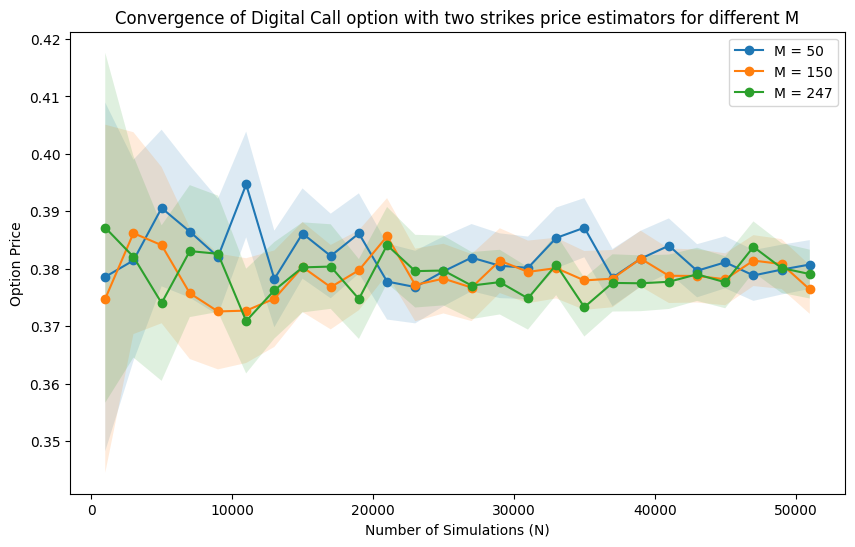

In [ ]:
# Create the estimators for each M
results_M1 = price_estimations(r, sigma, T, M1, N, x, Nf, step, K1, K2, two_strikes_payoff)
results_M2 = price_estimations(r, sigma, T, M2, N, x, Nf, step, K1, K2, two_strikes_payoff)
results_M3 = price_estimations(r, sigma, T, M3, N, x, Nf, step, K1, K2, two_strikes_payoff)
results = [results_M1, results_M2, results_M3]
# Display the results
for i in range(3) :
    print('\nIn the case of', M[i], ':')
    display(results[i])
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    results[i].set_index(np.arange(1000, 51001, 2000), inplace = True)
    plt.plot(results[i]['Option_Price'], marker = 'o', label = M[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Convergence of Digital Call option with two strikes price estimators for different M")
plt.legend()
plt.show()

We observe for the two options that changing the values of M has no significant impact on either the empirical variances or the convergence of the estimators. Consequently, in the next question we will use the case M = 247 and N = 30 000.

### Question b)

In this section, we will compute the ∆(x) for the two options using the finite difference method, precise the empirical variance of each estimator and the corresponding confidence intervals, and at the same time, we will variate the value of ε to see its impact on our estimators.

We define the function delta_estimation of the finite difference method calculation.

In [ ]:
def delta_estimation(r, sigma, T, M, N, x, K1, K2, epsilons, payoff_function):
    deltas = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for epsilon in epsilons:
        # Asset price path for (x - epsilon) and (x + epsilon)
        prices_minus = asset_prices(r, sigma, T, M, N, x - epsilon)[0]
        prices_plus = asset_prices(r, sigma, T, M, N, x + epsilon)[0]
        spot_price_minus = (T/(M+1))*prices_minus.sum(axis = 1)
        spot_price_plus = (T/(M+1))*prices_plus.sum(axis = 1)
        # Finite difference method calculation
        payoff_minus = payoff_function(spot_price_minus, K1, K2)
        payoff_plus = payoff_function(spot_price_plus, K1, K2)
        payoff_derivative = (payoff_plus - payoff_minus) / (2 * epsilon)
        delta = np.mean(np.exp(-r*T)*payoff_derivative)
        deltas.append(delta)
        emp_var = np.var(payoff_derivative, ddof = 1)/N
        emp_vars.append(emp_var)
        confidence_inters_lower.append(delta - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(delta + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Delta' : deltas, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.array(epsilons), inplace=True)
    df.index.name = 'Epsilons'
    return df

The standard European option with strike K1 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
Epsilons,,,,
0.01,1.591541,6.674169,-3.472004,6.655086
0.02,1.888841,1.689470,-0.658759,4.436441
0.03,0.851494,0.740700,-0.835359,2.538347
0.04,0.427579,0.422574,-0.846533,1.701690
0.05,0.751343,0.276217,-0.278761,1.781448
0.06,1.170654,0.187899,0.321046,2.020262
0.07,-0.076186,0.137689,-0.803473,0.651101
0.08,0.704008,0.103986,0.071969,1.336047
0.09,0.487165,0.085559,-0.086144,1.060474


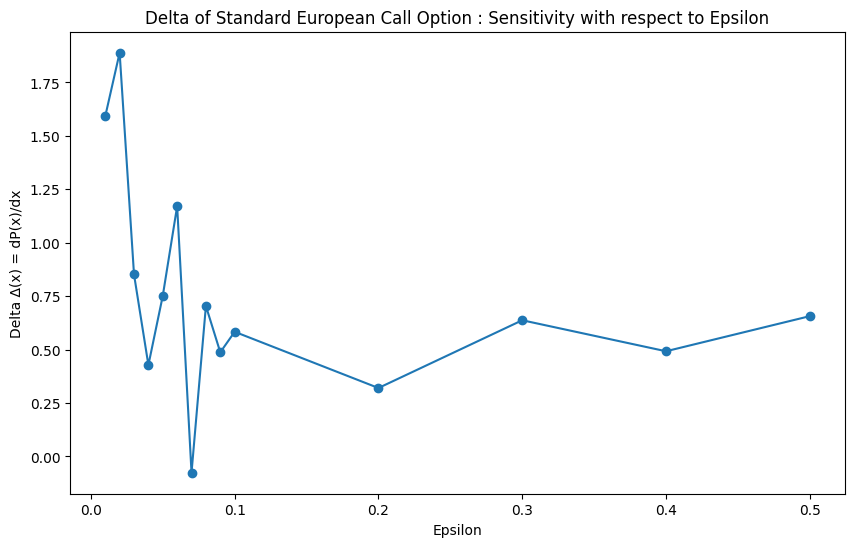

In [ ]:
epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
results = delta_estimation(r, sigma, T, M3, 30000, x, K1, K2, epsilons, standard_payoff) # M = 247, N = 30000
display(results)
# Plot the sensitivity with respect to epsilon
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Delta'], marker = 'o', label = 'M = 247, N = 30000')
plt.xlabel("Epsilon")
plt.ylabel("Delta ∆(x) = dP(x)/dx")
plt.title("Delta of Standard European Call Option : Sensitivity with respect to Epsilon")
plt.show()

The Digital Call option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
Epsilons,,,,
0.01,-0.486712,0.039295,-0.875244,-0.098180
0.02,0.053903,0.009970,-0.141800,0.249606
0.03,0.067115,0.004450,-0.063629,0.197858
0.04,0.079269,0.002486,-0.018455,0.176994
0.05,0.037415,0.001582,-0.040543,0.115373
0.06,0.048090,0.001101,-0.016937,0.113117
0.07,-0.016760,0.000808,-0.072480,0.038960
0.08,-0.000793,0.000624,-0.049773,0.048188
0.09,0.003875,0.000490,-0.039505,0.047256


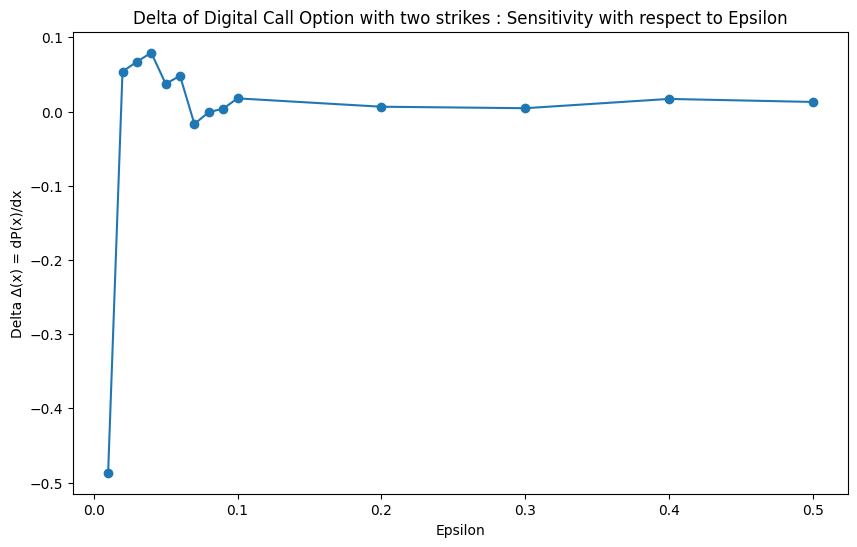

In [ ]:
results = delta_estimation(r, sigma, T, M3, 30000, x, K1, K2, epsilons, two_strikes_payoff)
display(results)
# Plot of the sensitivity with respect to epsilon
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Delta'], marker = 'o', label = 'M = 247, N = 30000')
plt.xlabel("Epsilon")
plt.ylabel("Delta ∆(x) = dP(x)/dx")
plt.title("Delta of Digital Call Option with two strikes : Sensitivity with respect to Epsilon")
plt.show()

The variation of epsilon has no significant impact neither on the delta value or on the empirical variance for the two options.

### Question c)

In this section, we will implement 2 methods.

We start with the Delta for Heston model:
<center>$\Delta(x) = \frac{e^{-rT}}{x} \mathbb{E}[f(S_T)(\int_{0}^{T}X_{s}^{x}\mathrm{d}s)\Pi_1]$ </center>
Where :
<center>$\Pi_1 = \frac{W_T}{\int_{0}^{T} G(t, T) dt} + \frac{\int_{0}^{T} \int_{s}^{T} D_s G(t, T) dtds}{(\int_{0}^{T} G(t, T) dt)^2}$</center>
$f(S_T)$ is the payoff function.

We start by defining the delta calculation function based on $\Pi_1$with different number of simulations.

In [ ]:
def delta_estimation_Pi_1(r, sigma, T, M, N, x, Nf, step, K1, K2, payoff_function):
    deltas = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for i in range(N, Nf+1, step):
        prices = asset_prices(r, sigma, T, M, i, x)[0]
        B = asset_prices(r, sigma, T, M, i, x)[1]
        spot_price = (T/(M+1))*prices.sum(axis = 1)
        # Pi_1 computation
        integral_1 = (T/(M+1))*np.arange(0, M+1).dot(prices.T)
        integral_2 = (T/(M+1))*np.square(np.arange(0, M+1)).dot(prices.T)
        Pi_1 = (spot_price/integral_1) * ((B[:, -1]/sigma)+(integral_2/(x*integral_1)))
        # Payoff calculation
        payoff = payoff_function(spot_price, K1, K2)
        delta_payoff = np.exp(-r*T) * payoff * Pi_1/x
        delta = np.mean(delta_payoff)
        deltas.append(delta)
        emp_var = np.var(delta_payoff, ddof = 1)/N
        emp_vars.append(emp_var)
        confidence_inters_lower.append(delta - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(delta + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Delta' : deltas, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.arange(1000, 51001, 2000), inplace = True)
    df.index.name = 'N'
    return df

The standard European Call option option with strike K1 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.000630,1.487585e-08,0.000391,0.000869
3000,0.000494,1.540392e-08,0.000251,0.000738
5000,0.000590,1.672377e-08,0.000336,0.000843
7000,0.000589,1.634948e-08,0.000339,0.000840
9000,0.000556,1.629476e-08,0.000306,0.000806
11000,0.000519,1.622167e-08,0.000269,0.000768
13000,0.000609,1.608337e-08,0.000361,0.000858
15000,0.000597,1.555689e-08,0.000353,0.000841
17000,0.000643,1.689084e-08,0.000388,0.000898


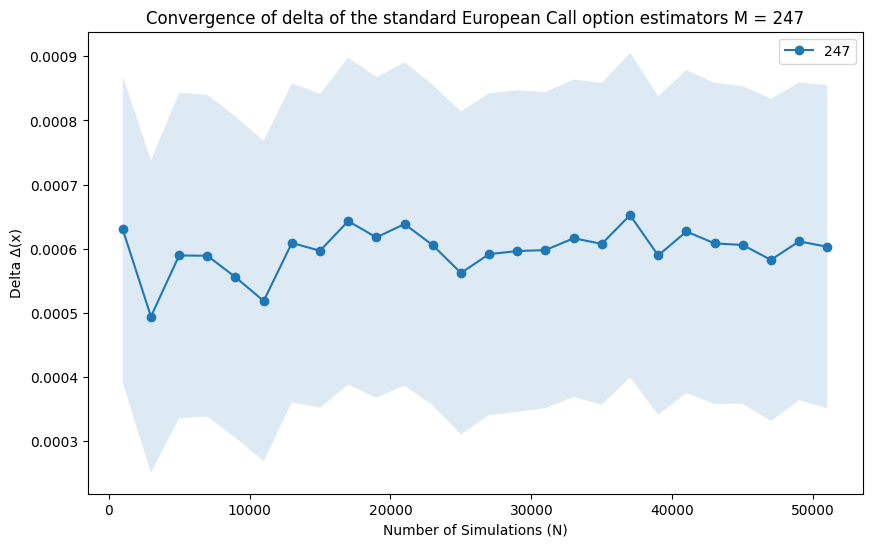

In [ ]:
results_Pi_1_std = delta_estimation_Pi_1(r, sigma, T, M3, N, x, Nf, step, K1, K2, standard_payoff)
# Display the results
display(results_Pi_1_std)
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_1_std['Delta'], marker = 'o', label = M3)
plt.fill_between(results_Pi_1_std.index, results_Pi_1_std['Lower Confidence Interval'],results_Pi_1_std['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of the standard European Call option estimators M = 247")
plt.legend()
plt.show()

For the Digital Call option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.000064,1.134138e-10,0.000043,0.000085
3000,0.000049,1.097871e-10,0.000028,0.000069
5000,0.000055,1.025934e-10,0.000035,0.000075
7000,0.000043,1.042545e-10,0.000023,0.000063
9000,0.000055,1.062172e-10,0.000034,0.000075
11000,0.000045,1.066866e-10,0.000025,0.000065
13000,0.000053,1.049308e-10,0.000033,0.000073
15000,0.000047,1.058456e-10,0.000027,0.000067
17000,0.000048,1.038103e-10,0.000028,0.000068


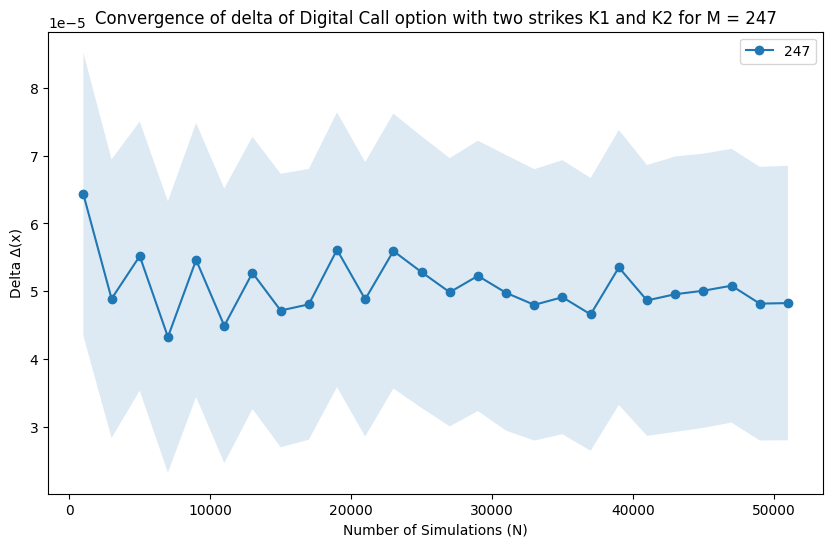

In [ ]:
results_Pi_1_two_strikes = delta_estimation_Pi_1(r, sigma, T, M3, N, x, Nf, step, K1, K2, two_strikes_payoff)
# Display the results
display(results_Pi_1_two_strikes)
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_1_two_strikes['Delta'], marker = 'o', label = M3)
plt.fill_between(results_Pi_1_two_strikes.index, results_Pi_1_two_strikes['Lower Confidence Interval'],results_Pi_1_two_strikes['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of Digital Call option with two strikes K1 and K2 for M = 247")
plt.legend()
plt.show()

We will use the CEV model:
<center>$\Delta(x) = \frac{e^{-rT}}{x} \mathbb{E}[f(S_T)(\int_{0}^{T}X_{s}^{x}\mathrm{d}s)\Pi_2]$</center>
Where :
<center>$\Pi_2 = \frac{2}{\sigma}[ \frac{X_{T}^{x} - x}{\int_{0}^{T}X_{s}^{x}\mathrm{d}s} - r] + 1$</center>
$f(S_T)$ is the payoff function.

We start by defining the delta calculation function based on $\Pi_1$with different number of simulations.

In [ ]:
def delta_estimation_Pi_2(r, sigma, T, M, N, x, Nf, step, K1, K2, payoff_function):
    deltas = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for i in range(N, Nf+1, step):
        prices = asset_prices(r, sigma, T, M, i, x)[0]
        B = asset_prices(r, sigma, T, M, i, x)[1]
        spot_price = (T/(M+1))*prices.sum(axis = 1)
        # Pi_1 computation
        integral_1 = (T/(M+1))*np.arange(0, M+1).dot(prices.T)
        integral_2 = (T/(M+1))*np.square(np.arange(0, M+1)).dot(prices.T)
        Pi_2 = (2/sigma) * (( (prices[:, -1]-x) /spot_price) - r)
        # Calculation of the payoff
        payoff = payoff_function(spot_price, K1, K2)
        delta_payoff = np.exp(-r*T) * payoff * Pi_2/x
        delta = np.mean(delta_payoff)
        deltas.append(delta)
        emp_var = np.var(delta_payoff, ddof = 1)/N
        emp_vars.append(emp_var)
        confidence_inters_lower.append(delta - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(delta + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Delta' : deltas, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.arange(1000, 51001, 2000), inplace = True)
    df.index.name = 'N'
    return df

The standard European Call option with strike K1 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.077421,0.000033,0.066169,0.088673
3000,0.087293,0.000039,0.075066,0.099520
5000,0.084730,0.000042,0.071965,0.097496
7000,0.082142,0.000039,0.069835,0.094449
9000,0.084406,0.000040,0.072039,0.096773
11000,0.085877,0.000043,0.073023,0.098730
13000,0.081901,0.000040,0.069515,0.094286
15000,0.086086,0.000044,0.073044,0.099129
17000,0.082198,0.000040,0.069808,0.094588


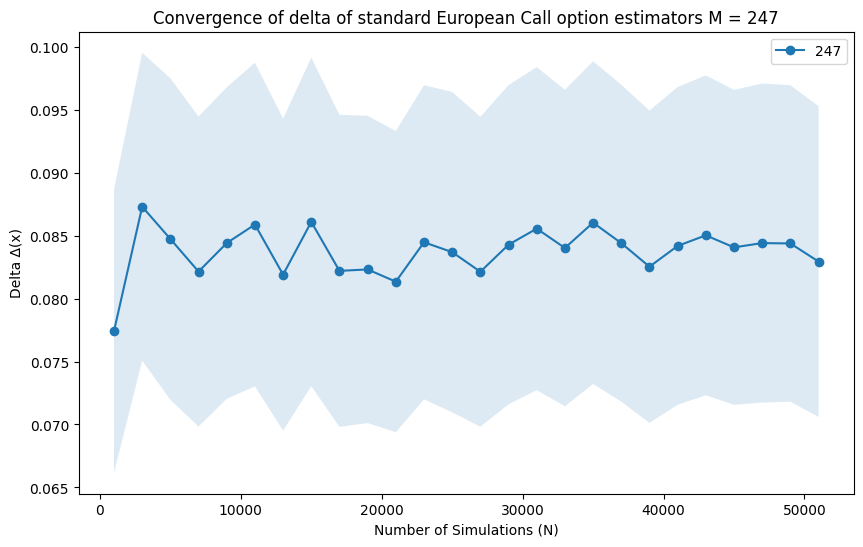

In [ ]:
results_Pi_2_std = delta_estimation_Pi_2(r, sigma, T, M3, N, x, Nf, step, K1, K2, standard_payoff)
# Display the results
display(results_Pi_2_std)
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_2_std ['Delta'], marker = 'o', label = M3)
plt.fill_between(results_Pi_2_std .index, results_Pi_2_std ['Lower Confidence Interval'],results_Pi_2_std ['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of standard European Call option estimators M = 247")
plt.legend()
plt.show()

The Digital Call option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.001439,5.012850e-08,0.001000,0.001878
3000,0.001237,4.915581e-08,0.000802,0.001671
5000,0.001364,5.327953e-08,0.000912,0.001817
7000,0.001462,4.960122e-08,0.001025,0.001898
9000,0.001132,4.718601e-08,0.000706,0.001558
11000,0.001349,5.106717e-08,0.000906,0.001792
13000,0.001348,5.114682e-08,0.000905,0.001791
15000,0.001309,4.964868e-08,0.000873,0.001746
17000,0.001343,4.880672e-08,0.000910,0.001776


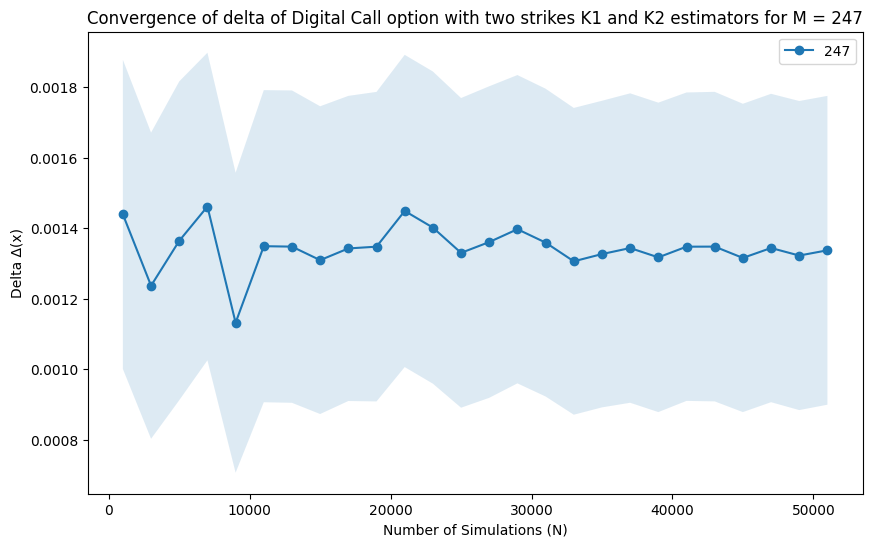

In [ ]:
results_Pi_2_two_strikes = delta_estimation_Pi_2(r, sigma, T, M3, N, x, Nf, step, K1, K2, two_strikes_payoff)
# Display the results
display(results_Pi_2_two_strikes)
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_2_two_strikes['Delta'], marker = 'o', label = M3)
plt.fill_between(results_Pi_2_two_strikes.index, results_Pi_2_two_strikes['Lower Confidence Interval'],results_Pi_2_two_strikes['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of Digital Call option with two strikes K1 and K2 estimators for M = 247")
plt.legend()
plt.show()

### Question d)

In this part, we will compare the previous three methods for different simulations : Finite difference method with epsilon fixed on 0.01, $\Pi_1$ method and $\Pi_2$ method. Then, we will compare them  graphically and in terms of empirical variance.

For the standard European Call option :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,-12.393366,227.789896,-41.975078,17.188346
3000,15.380497,65.486970,-0.480611,31.241605
5000,5.055556,39.951673,-7.333082,17.444194
7000,0.402449,27.661293,-9.905975,10.710874
9000,-0.583352,22.729985,-9.927843,8.761139
11000,4.527689,18.280738,-3.852483,12.907861
13000,-1.951264,15.428088,-9.649870,5.747343
15000,6.075757,13.545256,-1.137804,13.289317
17000,-0.945497,11.974891,-7.728030,5.837035


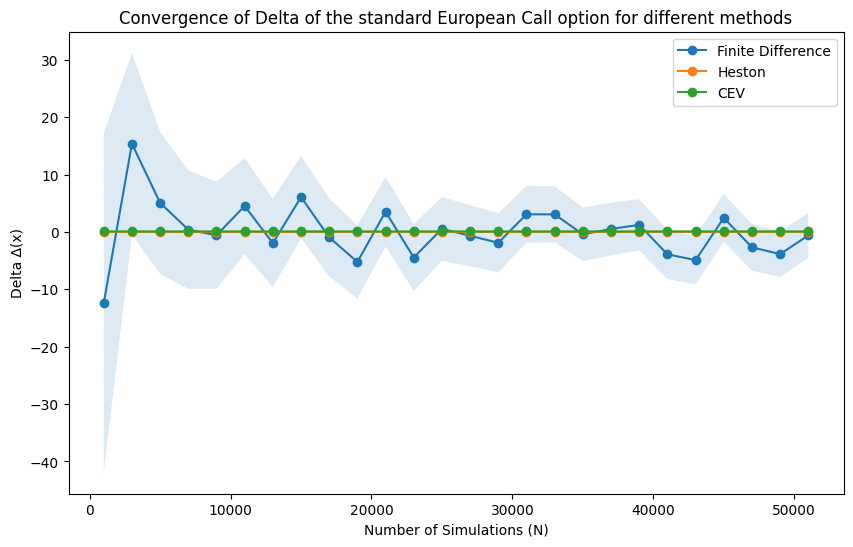

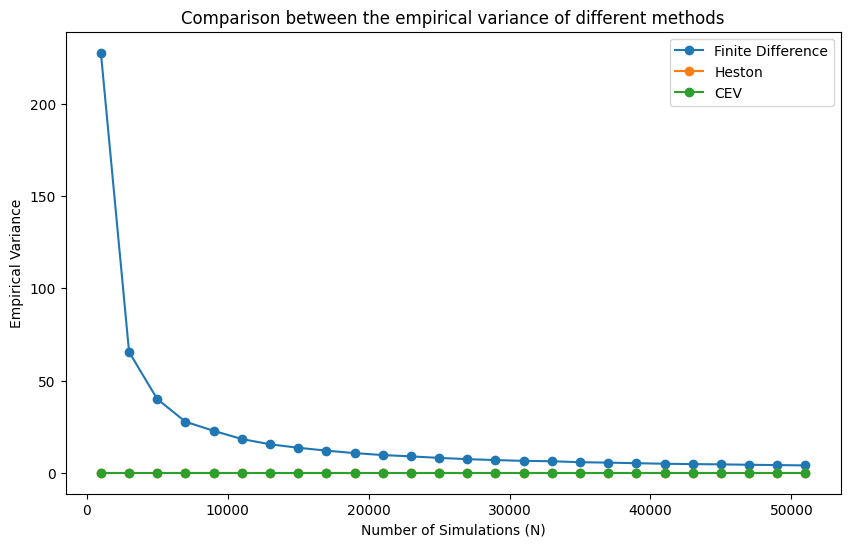

In [ ]:
results_FD_std = pd.DataFrame()
for i in range(N, Nf+1, step):
    results_FD_std = pd.concat([results_FD_std, delta_estimation(r, sigma, T, M2, i, x, K1, K2, epsilons[:2], standard_payoff).iloc[:1,:]])
results_FD_std.set_index(np.arange(N, Nf+1, step), inplace = True)
results_FD_std.index.name = 'N'
display(results_FD_std)
results = [results_FD_std, results_Pi_1_std, results_Pi_2_std]
Method = ['Finite Difference', 'Heston', 'CEV']
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Delta'], marker = 'o', label = Method[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of Delta of the standard European Call option for different methods")
plt.legend()
plt.show()
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Empirical Var'], marker = 'o', label = Method[i])
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Empirical Variance")
plt.title("Comparison between the empirical variance of different methods")
plt.legend()
plt.show()

We can conclude from the graphs that all the three methods have a good estimation of Delta. The methods deduced from part B of the project are better since they have a good performance for almost all the values of N, while the efficiency of the finite difference method depends on the value of N.

The Digital Call option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,-10.902550,212.382984,-39.466347,17.661246
3000,0.811177,65.371286,-15.035915,16.658270
5000,-1.637465,40.239015,-14.070575,10.795644
7000,-2.749530,28.663027,-13.242951,7.743891
9000,10.997259,22.675431,1.663988,20.330529
11000,-4.752302,18.181602,-13.109720,3.605117
13000,10.116461,15.420119,2.419843,17.813079
15000,-1.441240,12.872790,-8.473459,5.590979
17000,-5.103070,11.835401,-11.845983,1.639843


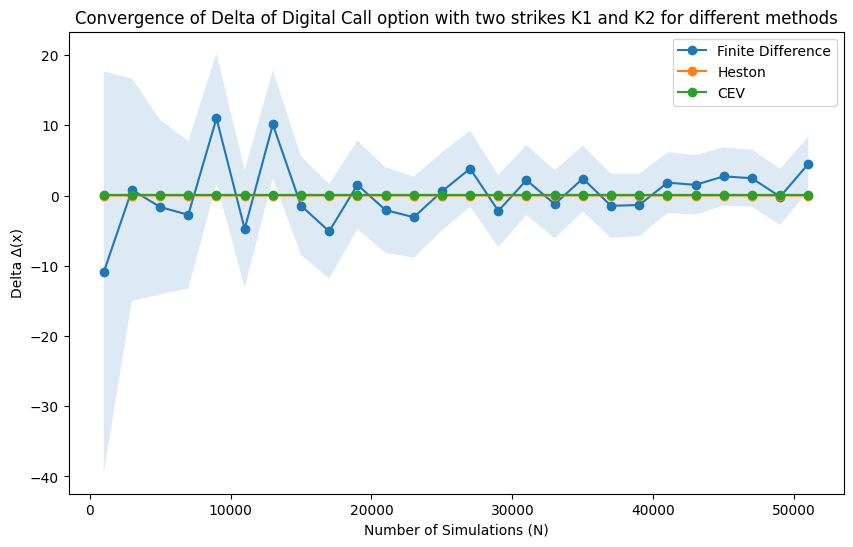

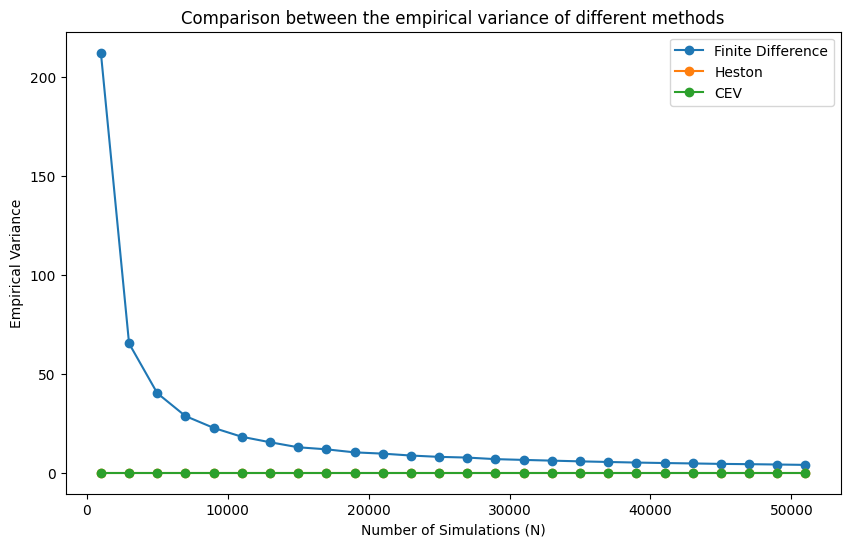

In [ ]:
results_FD_two_strikes = pd.DataFrame()
for i in range(N, Nf+1, step):
    results_FD_two_strikes = pd.concat([results_FD_two_strikes, delta_estimation(r, sigma, T, M3, i, x, K1, K2, epsilons[:2], standard_payoff).iloc[:1,:]])
results_FD_two_strikes.set_index(np.arange(N, Nf+1, step), inplace = True)
results_FD_two_strikes.index.name = 'N'
display(results_FD_two_strikes)
results = [results_FD_two_strikes, results_Pi_1_std, results_Pi_2_std]
Method = ['Finite Difference', 'Heston', 'CEV']
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Delta'], marker = 'o', label = Method[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of Delta of Digital Call option with two strikes K1 and K2 for different methods")
plt.legend()
plt.show()
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Empirical Var'], marker = 'o', label = Method[i])
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Empirical Variance")
plt.title("Comparison between the empirical variance of different methods")
plt.legend()
plt.show()

Same conclusion as before.

**Applications of the Malliavin Calculus to the fractional Black-Scholes Model**

Monte-Carlo simulation for European Call option

In [ ]:
! sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog

debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 21.)

debconf: falling back to frontend: Readline

debconf: unable to initialize frontend: Readline

debconf: (This frontend requires a controlling tty.)

debconf: falling back to frontend: Teletype

dpkg-preconfigure: unable to re-open stdin: 

Selecting previously unselected package libmspack0:amd64.

(Reading database ... 121925 files and directories currently installed.)

Preparing to unpack .../00-libmspack0_0.10.1-2build2_amd64.deb ...

Unpacking libmspack0:amd64 (0.10.1-2build2) ...

Selecting previously unselected package cabextract.

Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...

Unpacking cabextract (1.9-3) ...

Selecting previously unselected package libfontenc1:amd64.

Preparing to unpack .../02-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...

Unpacking libfo

In [ ]:
from scipy.stats import norm

Risk-free interest rate: r = 0.05

Volatility: σ = 0.15

Initial asset price: S₀ = 100

Strike price: K = 100

Maturity date: T = 1

Number of simulations: N = 20000

Computation time: 13.024 seconds


TypeError: 'module' object does not support item assignment

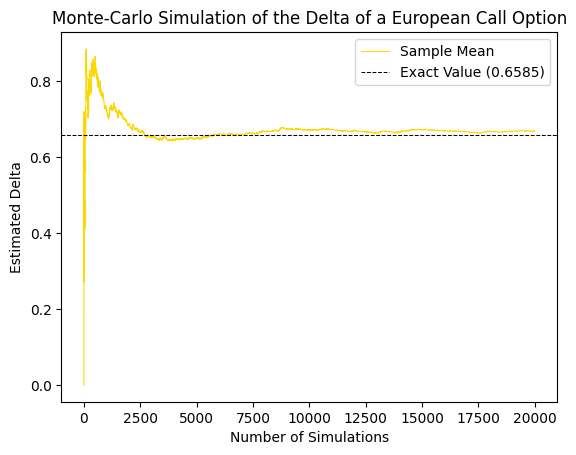

In [ ]:
def MonteCarloEuropeanCallDelta(r,sigma,S0,K,T,N):
    start = time.time()
    d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
    SAMPLE = []
    PATH = []
    for i in range(N):
        W = np.random.normal(0, np.sqrt(T))
        S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)
        V = max(S - K,0)
        SAMPLE.append(np.exp(-r*T)*V*W / (S0*T*sigma))
        PATH.append(sum(SAMPLE) / len(SAMPLE))
    end = time.time()
    print("Risk-free interest rate: r = " + str(r))
    print("Volatility: \u03C3 = " + str(sigma))
    print("Initial asset price: " + "S0".translate(str.maketrans("0", "₀")) + " = " + str(S0))
    print("Strike price: K = " + str(K))
    print("Maturity date: T = " + str(T))
    print("Number of simulations: N = " + str(N))
    print("Computation time: " + str(round(end - start, 3)) + " seconds")
    pd.Series(PATH).plot(linewidth = 0.75, color = "gold")
    plt.axhline(norm.cdf(d), color = "black", linestyle = "--", linewidth = 0.75)
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Delta")
    plt.legend(["Sample Mean", "Exact Value (" + str(round(norm.cdf(d),4)) + ")"])
    plt.title("Monte-Carlo Simulation of the Delta of a European Call Option")
    plt['figure.dpi'] = 300
    plt['savefig.dpi'] = 300

MonteCarloEuropeanCallDelta(0.05,0.15,100,100,1,20000)

**Monte Carlo simulation of Digital Call Option**

Risk-free interest rate: r = 0.05

Volatility: σ = 0.15

Initial asset price: S₀ = 100

Strike price: K = 100

Maturity date: T = 1

Number of monitoring times: M = 247

Time increment between monitoring times: Δt = 0.004

Number of simulations: N = 20000

Computation time: 36.277 seconds


TypeError: 'module' object does not support item assignment

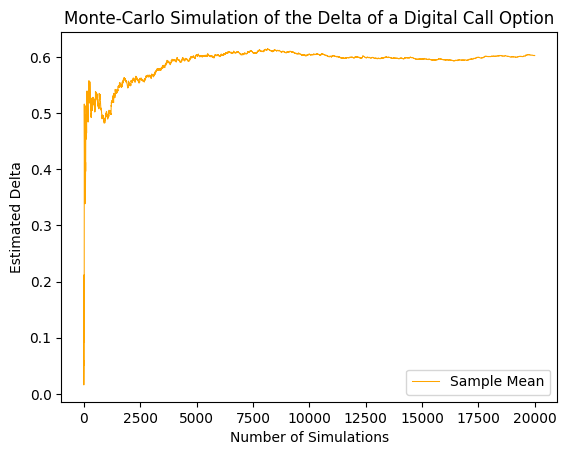

In [ ]:
def MonteCarloDigitalCallDelta(r,sigma,S0,K,T,M,N):
    start = time.time()
    dt = T / M
    SAMPLE = []
    PATH = []
    S = np.zeros(M + 1)
    S[0] = S0
    for i in range(N):
        for j in range(1,M+1):
            S[j] = S[j-1]*np.exp((r - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1))
        STBar = np.mean(S[1:])
        VT = max(STBar - K, 0)
        SAMPLE.append(((np.exp(-r*T)) / (S0*sigma**2)) * (VT*(((2*(S[-1]-S0)))/(STBar)+sigma**2-2*r)))
        PATH.append(sum(SAMPLE) / len(SAMPLE))
    end = time.time()
    print("Risk-free interest rate: r = " + str(r))
    print("Volatility: \u03C3 = " + str(sigma))
    print("Initial asset price: " + "S0".translate(str.maketrans("0", "₀")) + " = " + str(S0))
    print("Strike price: K = " + str(K))
    print("Maturity date: T = " + str(T))
    print("Number of monitoring times: M = " + str(M))
    print("Time increment between monitoring times: \u0394t = " + str(round(dt,3)))
    print("Number of simulations: N = " + str(N))
    print("Computation time: " + str(round(end - start, 3)) + " seconds")
    pd.Series(PATH).plot(linewidth = 0.75, color = "orange")
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Delta")
    plt.legend(["Sample Mean"])
    plt.title("Monte-Carlo Simulation of the Delta of a Digital Call Option")
    plt['figure.dpi'] = 300
    plt['savefig.dpi'] = 300

MonteCarloDigitalCallDelta(0.05,0.15,100,100,1,247,20000)

### Question e)

Conclusion : we can observe that the efficiency of the finite difference method depends on the values of N, but the mathematical results from Malliavin weighted scheme variate less with respect to the value of N so they are generally more performant.